In [1]:
import torch
import dill
import os.path as op
import numpy as np
import hnn_core
from hnn_core import simulate_dipole, Network, read_params, JoblibBackend
import matplotlib as mpl
import matplotlib.pyplot as plt
import sbi.utils as utils
from sbi.inference.base import infer
import multiprocessing
import datetime
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from scipy import interpolate


In [2]:
posterior_file = open('../../data/ERP/12152020_161701/posterior_ERPYes_t100_12152020_161701', 'rb')
posterior = dill.load(posterior_file)
posterior_file.close()

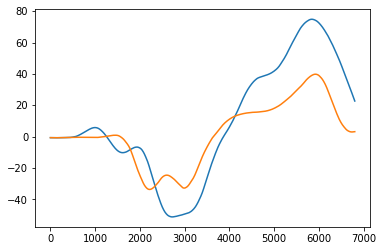

In [3]:
ERPYes_dpl = np.loadtxt('../../data/ERP/ERPYes_dpl.txt', delimiter=',')
ERPNo_dpl = np.loadtxt('../../data/ERP/ERPNo_dpl.txt', delimiter=',')


plt.figure()
plt.plot(ERPYes_dpl)
plt.plot(ERPNo_dpl)


In [7]:
prior_dict = {'gbar_L2Pyr_L2Pyr_ampa':(0, 0.01),
'gbar_L2Pyr_L2Pyr_nmda':(0, 0.01), 
'gbar_L2Basket_L2Pyr_gabaa':(0, 0.1),
'gbar_L2Basket_L2Pyr_gabab':(0, 0.1),
'gbar_L2Pyr_L5Pyr':(0, 0.01),
'gbar_L2Basket_L5Pyr':(0, 0.1),
'gbar_L5Pyr_L5Pyr_ampa':(0, 0.01),
'gbar_L5Pyr_L5Pyr_nmda':(0, 0.01),
'gbar_L5Basket_L5Pyr_gabaa':(0, 0.1),
'gbar_L5Basket_L5Pyr_gabab':(0, 0.1),
'gbar_L2Pyr_L2Basket':(0, 0.01),
'gbar_L2Basket_L2Basket':(0, 0.1),
'gbar_L2Pyr_L5Basket':(0, 0.01),
'gbar_L5Pyr_L5Basket':(0, 0.01),
'gbar_L5Basket_L5Basket':(0, 0.1)}

param_low = [float(item[0]) for key, item in prior_dict.items()]
param_high = [float(item[1]) for key, item in prior_dict.items()]
limits = [[param_low[idx], param_high[idx]] for idx in range(len(param_low))]
condition = [np.mean([param_low[idx], param_high[idx]]) for idx in range(len(limits))]
param_names = list(prior_dict.keys())


In [11]:
samples = posterior.sample((100000,), x=ERPYes_dpl, sample_with_mcmc=True)
# log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names,sample_with_mcmc=True)


Tuning bracket width...: 100%|██████████| 50/50 [00:09<00:00,  5.35it/s]

Generating samples: 100%|██████████| 20/20 [00:36<00:00,  1.81s/it]

Generating samples:   0%|          | 23/100000 [00:41<51:06:59,  1.84s/it]

KeyboardInterrupt: 

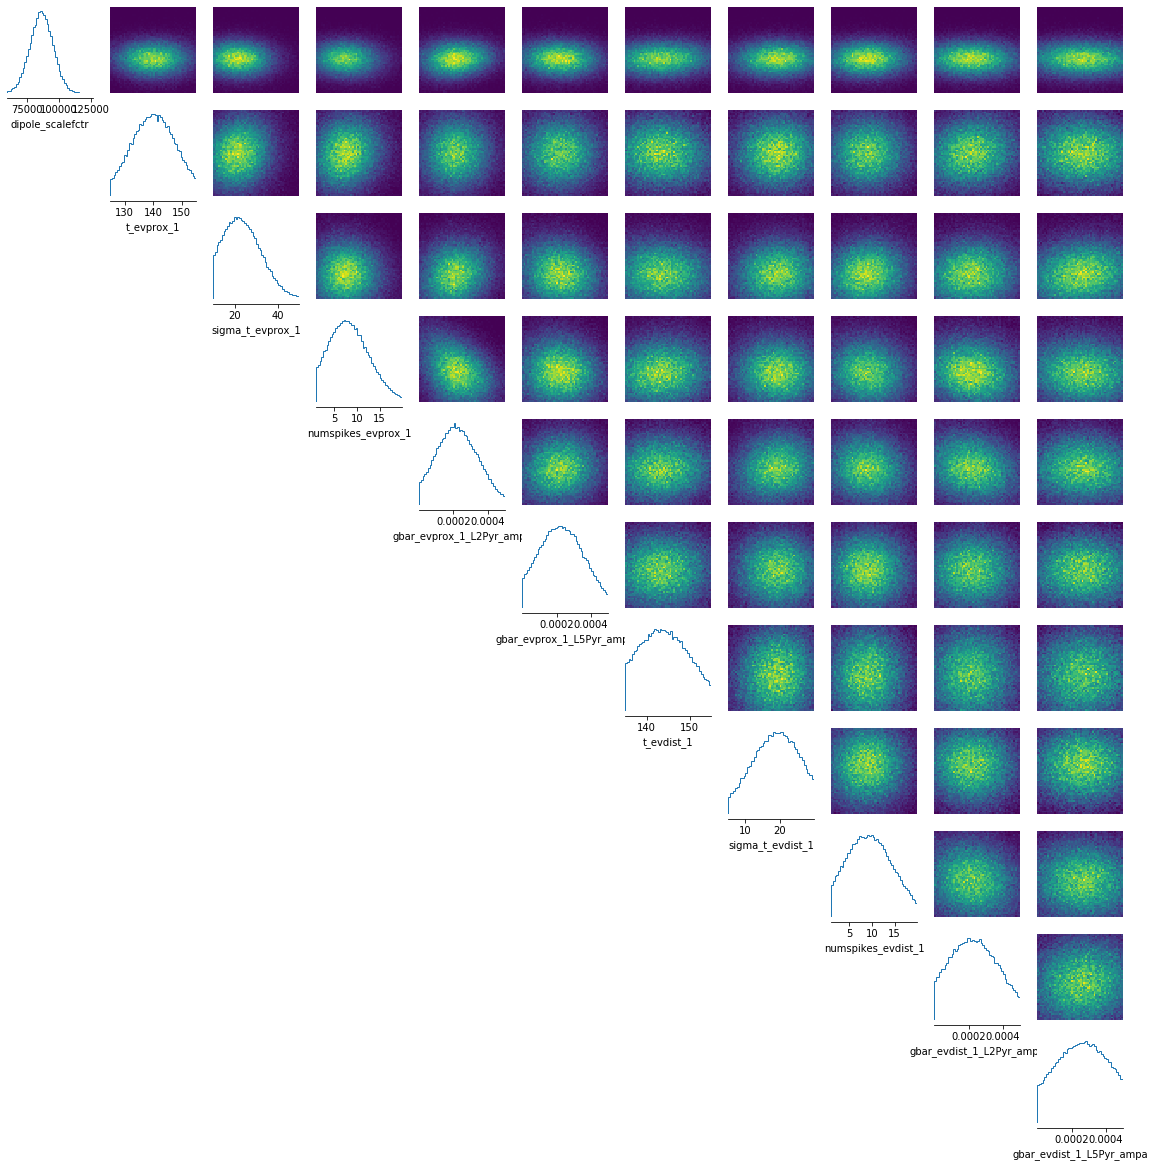

In [17]:
samples = posterior.sample((100000,), x=ERPNo_dpl, sample_with_mcmc=True)
#log_probability = posterior.log_prob(samples, x=observation)
_ = utils.pairplot(samples, fig_size=(20,20), labels=param_names)

In [12]:
condition = posterior.sample((1,), x=ERPYes_dpl)


                        prior support. It may take a long time to collect the remaining
                        -6 samples. Consider interrupting (Ctrl-C)
                        and switching to `sample_with_mcmc=True`.



In [15]:
posterior.set_default_x(ERPYes_dpl)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)

AttributeError: 'bool' object has no attribute 'any'

In [ ]:
posterior.set_default_x(ERPNo_dpl)
_ = utils.conditional_pairplot(density=posterior, condition=condition, fig_size=(20,20), labels=param_names, limits=limits)